<a href="https://colab.research.google.com/github/eovallemagallanes/pattern-recognition/blob/main/BayesVSknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(cov, mu, n_std, ax, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(*mu)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [2]:
euc_dist = lambda X,Y: (X-Y).T@(X-Y)

def knn(x0, X, ks):
    c, h = X.shape[:2]
    all_d = np.zeros((c, h))
    # iterate by class
    for j, xi in enumerate(X):
        all_dj = np.zeros(len(xi))
        for i, xii in enumerate(xi):
            xii = np.expand_dims(xii, axis=1)
            d = euc_dist(xii, x0)[0][0]
            all_dj[i] = d
        
        all_dj.sort()
        all_d[j] = all_dj[:]

    mean_k_distance = np.zeros(c)
    for i, ki in enumerate(ks):
        mean_k_distance[i] = np.mean(all_d[i][:ki])

    class_idx = np.argmin(mean_k_distance)

    return mean_k_distance, class_idx

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features from 4.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [4]:
# get mu and cov
x1 = X[np.where(y == 0)]
x2 = X[np.where(y == 1)]
x3 = X[np.where(y == 2)]

mu1 = np.expand_dims(np.mean(x1,axis=0), axis=1)
mu2 = np.expand_dims(np.mean(x2,axis=0), axis=1)
mu3 = np.expand_dims(np.mean(x3,axis=0), axis=1)

mus = [mu1, mu2, mu3]

cov1 = np.cov(x1.T)
cov2 = np.cov(x2.T)
cov3 = np.cov(x3.T)

covs = [cov1, cov2, cov3]

Test point:  [[6.9631635  2.42279467]]
Distances:  [[[320.23147573  19.45220038   7.91925591]]]
Bayes--> Test point is class:  virginica
Distances:  [3.39757901 0.32193604 0.27534992]
Knn--> Test point is class:  virginica


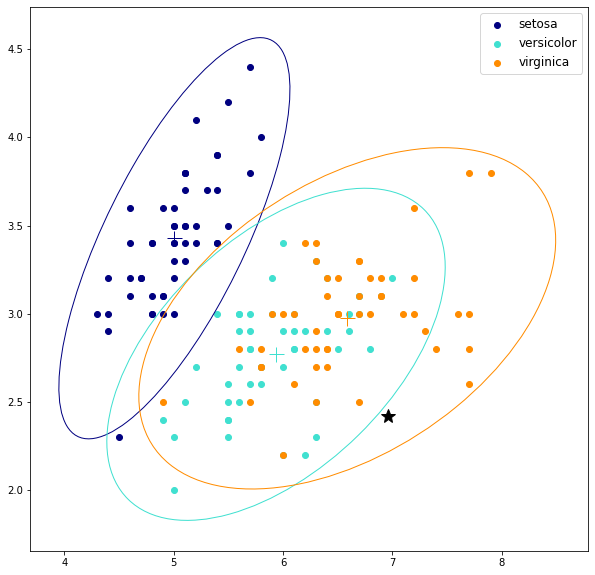

In [10]:
colors = ["navy", "turquoise", "darkorange"]
labels = iris.target_names


# test_point
test_idx = np.random.randint(0, 150)
y_test = y[test_idx]
y_label = labels[y_test]
x0 =  np.expand_dims(X[test_idx], axis=1) + np.random.uniform(-1, 1, (2, 1)) ##np.array([[np.random.uniform(x_min,x_max)], [np.random.uniform(y_min, y_max)]])
print('Test point: ', x0.T)

gi = lambda x,mu,C,p: -0.5* ((x-mu).T @ np.linalg.inv(C) @ (x-mu) * np.log(np.linalg.det(C))) + np.log(p)

distances = np.array([gi(x0, mi, covi, 1/3) for mi, covi in zip(mus, covs)])

print('Distances: ', distances.T)
pred_idx = np.argmin(distances)
pred_label = labels[pred_idx]
print('Bayes--> Test point is class: ', pred_label)

# knn
Xs = np.array([x1, x2, x3])
ks = [round(np.log(len(xi))) for xi in Xs]

d, c = knn(x0, Xs, ks)
pred_label = labels[c]
print('Distances: ', d)
print('Knn--> Test point is class: ', pred_label)


plt.figure(2, figsize=(10, 10))
plt.clf()
ax = plt.axes()
#plot points
for n, color in enumerate(colors):
    data = X[iris.target == n]
    ax.scatter(
        data[:, 0], data[:, 1], color=color, label=labels[n]
    )

#plot mus
for n, (mui, covi) in enumerate(zip(mus, covs)):
    ax.plot(*mui, '+', color=colors[n], markersize=15)
    confidence_ellipse(covi, mui, 3, ax, edgecolor=colors[n])

#plot test point
ax.plot(*x0, '*', color='black', markersize=15)

ax.legend(scatterpoints=1, loc="best", prop=dict(size=12))
plt.show()

## Now for a 4D feature vector

In [15]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:]
y = iris.target

# get mu and cov
x1 = X[np.where(y == 0)]
x2 = X[np.where(y == 1)]
x3 = X[np.where(y == 2)]

mu1 = np.expand_dims(np.mean(x1,axis=0), axis=1)
mu2 = np.expand_dims(np.mean(x2,axis=0), axis=1)
mu3 = np.expand_dims(np.mean(x3,axis=0), axis=1)

mus = [mu1, mu2, mu3]

cov1 = np.cov(x1.T)
cov2 = np.cov(x2.T)
cov3 = np.cov(x3.T)

covs = [cov1, cov2, cov3]

Test point:  [[7.08913566 2.8222745  5.2436422  0.93252969]]
Ground truth label:  versicolor


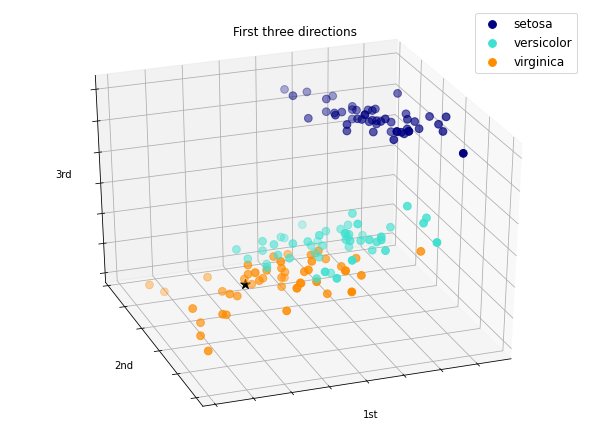

Distances:  [[[3544.76661897  223.70983236  107.67269594]]]
Bayes--> Test point is class:  virginica
Distances:  [16.33897075  0.62794012  1.06975804]
Knn-> Test point is class:  versicolor


In [16]:
from sklearn.decomposition import PCA

# test_point
test_idx = np.random.randint(0, 150)
y_test = y[test_idx]
y_label = labels[y_test]
x0 =  np.expand_dims(X[test_idx], axis=1) + np.random.uniform(-1, 1, (4, 1)) ##np.array([[np.random.uniform(x_min,x_max)], [np.random.uniform(y_min, y_max)]])
print('Test point: ', x0.T)
print('Ground truth label: ', y_label)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = X[:, :3] #PCA(n_components=3).fit_transform(iris.data)

for i, xi in enumerate([x1, x2, x3]):
    ax.scatter(
        xi[:, 0],
        xi[:, 1],
        xi[:, 2],
        c=colors[i],
        s=60,
        label=labels[i]
    )

ax.scatter(
    x0[0],
    x0[1],
    x0[2],
    c='black',
    edgecolor="k",
    s=100,
    marker='*'
)

ax.legend(scatterpoints=1, loc="best", prop=dict(size=12))

ax.set_title("First three directions")
ax.set_xlabel("1st")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd")
ax.w_zaxis.set_ticklabels([])

plt.show()

gi = lambda x,mu,C,p: -0.5* ((x-mu).T @ np.linalg.inv(C) @ (x-mu) * np.log(np.linalg.det(C))) + np.log(p) # same as before

distances = np.array([gi(x0, mi, covi, 1/3) for mi, covi in zip(mus, covs)])

print('Distances: ', distances.T)
pred_idx = np.argmin(distances)
pred_label = labels[pred_idx]
print('Bayes--> Test point is class: ', pred_label)

Xs = np.array([x1, x2, x3])
ks = [round(np.log(len(xi))) for xi in Xs]

d, c = knn(x0, Xs, ks)
pred_label = labels[c]
print('Distances: ', d)
print('Knn-> Test point is class: ', pred_label)